# Three Josephson Junction Flux Qubit. Harmonic approximation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from palettable.cartocolors.sequential import BluGrn_7, OrYel_7, Magenta_7

from sympy import *
init_printing()

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams["figure.figsize"]=15,15
plt.rcParams.update({'font.size': 20})

---

## Initization

In [2]:
# Symbolic independent variable
ϕ = symbols('varphi') # Phase

# Symbolic functions
V  = Function('V')(ϕ)    # Qubit potential
UL = Function('U_L')(ϕ)  # Left harmonic well
UR = Function('U_R')(ϕ)  # Right harmonic well

L  = Function('L')(ϕ)    # Ground states of the left and right harmonic wells
R  = Function('R')(ϕ)
eL = Function('eL')(ϕ)   # Excited states of the left and right harmonic wells
eR = Function('eR')(ϕ)

q0 = Function('q_0')(ϕ)  # Eigenstates of te qubit
q1 = Function('q_1')(ϕ)
q2 = Function('q_2')(ϕ)
q3 = Function('q_2')(ϕ)

#Symbolic parameters
α, r = symbols('alpha, r', real=True, positive=True, nonzero=True)

#Symbolic constants
m, ω, ϕ0 = symbols('m, omega, varphi_0', real=True, positive=True, nonzero=True)

In [3]:
# Numeric parameters
α_n = 0.7
r_n = 50
# Numeric constants
m_n  = (r*(2*α+1)/4).subs([(α,α_n), (r, r_n)])          # Mass of the qubit
ω_n  = sqrt( 4*(2*α+1)/(α*r)).subs([(α,α_n), (r, r_n)]) # Frequency of the harmonic well
ϕ0_n = acos(1/(2*α)).subs([(α,α_n)])                    # Phase of the minima of the wells

------

## Potentials and wavefunctions

In [4]:
# Numeric parameters
α_n = 0.7
r_n = 50
# Numeric constants
m_n  = (r*(2*α+1)/4).subs([(α,α_n), (r, r_n)])          # Mass of the qubit
ω_n  = sqrt( 4*(2*α+1)/(α*r)).subs([(α,α_n), (r, r_n)]) # Frequency of the harmonic well
ϕ0_n = acos(1/(2*α)).subs([(α,α_n)])                    # Phase of the minima of the wells

In [5]:
# Potentials
V  = -2*cos(ϕ) + α*cos(2*ϕ)
UL = (4*α-1)/(2*α)*(ϕ+ϕ0)**2
UR = (4*α-1)/(2*α)*(ϕ-ϕ0)**2

In [6]:
# Harmonic wave functions
L  = (m*ω/pi)**(1/4) * exp(-m*ω*(ϕ+ϕ0)**2/2)
R  = (m*ω/pi)**(1/4) * exp(-m*ω*(ϕ-ϕ0)**2/2)
eL = L*sqrt(2*m*ω)*(ϕ+ϕ0)
eR = R*sqrt(2*m*ω)*(ϕ-ϕ0)

In [7]:
# Qubit wave functions
q0 =  L +  R
q1 =  L -  R
q2 = eL + eR
q3 = eL - eR

In [107]:
# Symbolic to numpy for plots
ϕ_np = np.linspace(-2,2,100)

V_np  = np.array([ V .subs([(α,α_n),(ϕ,ϕ_np[i])]).evalf() for i in range(len(ϕ_np)) ])

V_np -= V .subs([(α,α_n),(ϕ,ϕ0_n)]).evalf() # Shift the potential such that V(ϕ0)=0

UL_np = np.array([ UL .subs([(ϕ0,ϕ0_n),(α,α_n),(ϕ,ϕ_np[i])]) for i in range(len(ϕ_np)) ])
UR_np = np.array([ UR .subs([(ϕ0,ϕ0_n),(α,α_n),(ϕ,ϕ_np[i])]) for i in range(len(ϕ_np)) ])

L_np  = np.array([ L  .subs([(ϕ0,ϕ0_n),(m, m_n),(ω, ω_n),(α,α_n),(ϕ,ϕ_np[i])]) for i in range(len(ϕ_np)) ])
R_np  = np.array([ R  .subs([(ϕ0,ϕ0_n),(m, m_n),(ω, ω_n),(α,α_n),(ϕ,ϕ_np[i])]) for i in range(len(ϕ_np)) ])
eL_np = np.array([ eL .subs([(ϕ0,ϕ0_n),(m, m_n),(ω, ω_n),(α,α_n),(ϕ,ϕ_np[i])]) for i in range(len(ϕ_np)) ])
eR_np = np.array([ eR .subs([(ϕ0,ϕ0_n),(m, m_n),(ω, ω_n),(α,α_n),(ϕ,ϕ_np[i])]) for i in range(len(ϕ_np)) ])

q0_np = np.array([ q0 .subs([(ϕ0,ϕ0_n),(m, m_n),(ω, ω_n),(α,α_n),(ϕ,ϕ_np[i])]) for i in range(len(ϕ_np)) ])
q1_np = np.array([ q1 .subs([(ϕ0,ϕ0_n),(m, m_n),(ω, ω_n),(α,α_n),(ϕ,ϕ_np[i])]) for i in range(len(ϕ_np)) ])
q2_np = np.array([ q2 .subs([(ϕ0,ϕ0_n),(m, m_n),(ω, ω_n),(α,α_n),(ϕ,ϕ_np[i])]) for i in range(len(ϕ_np)) ])
q3_np = np.array([ q3 .subs([(ϕ0,ϕ0_n),(m, m_n),(ω, ω_n),(α,α_n),(ϕ,ϕ_np[i])]) for i in range(len(ϕ_np)) ])

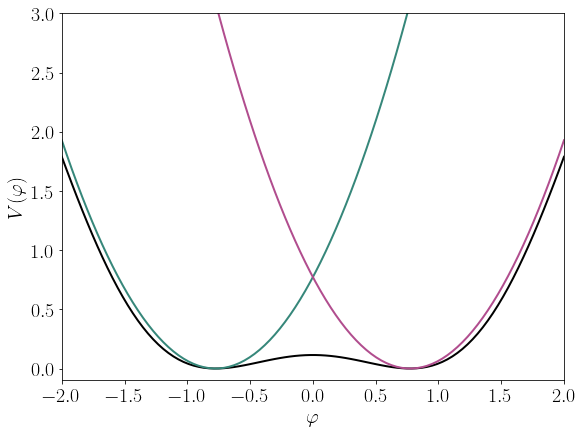

In [109]:
# Potential plots
fig, ax = plt.subplots(ncols=1, nrows=1,figsize=(6*1.5, 4.5*1.5))
ax.set_xlabel(' $\\varphi$ ')
ax.set_ylabel(' $V(\\varphi)$ ')

ax.plot( ϕ_np, V_np,  color = 'k', linewidth = 2 )

ax.plot( ϕ_np, UL_np, color = BluGrn_7 .mpl_colors[-3], linewidth = 2 )
ax.plot( ϕ_np, UR_np, color = Magenta_7.mpl_colors[-3], linewidth = 2 )
ax.set_ylim([-0.1,3])
ax.set_xlim([ϕ_np[0],ϕ_np[-1]])
plt.show()

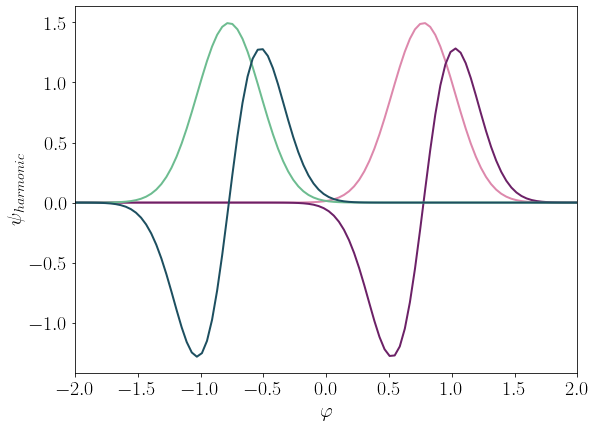

In [116]:
# Harmonic wavefunctions
fig, ax = plt.subplots(ncols=1, nrows=1,figsize=(6*1.5, 4.5*1.5))
ax.set_xlabel(' $\\varphi$ ')
ax.set_ylabel(' $\\psi_{harmonic}$ ')

ax.plot( ϕ_np,  R_np,  color = Magenta_7.mpl_colors[-5], linewidth = 2 ) 
ax.plot( ϕ_np, eR_np,  color = Magenta_7.mpl_colors[-1], linewidth = 2 ) 
ax.plot( ϕ_np,  L_np,  color = BluGrn_7 .mpl_colors[-5], linewidth = 2 )
ax.plot( ϕ_np, eL_np,  color = BluGrn_7 .mpl_colors[-1], linewidth = 2 )
ax.set_xlim([ϕ_np[0],ϕ_np[-1]])
plt.show()

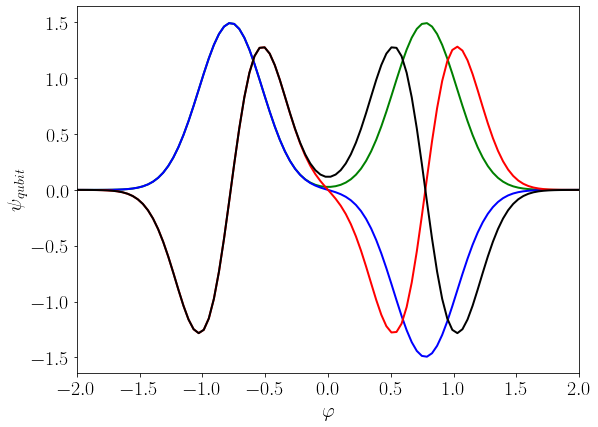

In [119]:
# Potential plots
fig, ax = plt.subplots(ncols=1, nrows=1,figsize=(6*1.5, 4.5*1.5))
ax.set_xlabel(' $\\varphi$ ')
ax.set_ylabel(' $\\psi_{qubit}$ ')

ax.plot( ϕ_np, q0_np,  color = 'g', linewidth = 2 ) 
ax.plot( ϕ_np, q1_np,  color = 'b', linewidth = 2 ) 
ax.plot( ϕ_np, q2_np,  color = 'r', linewidth = 2 )
ax.plot( ϕ_np, q3_np,  color = 'k', linewidth = 2 )
ax.set_xlim([ϕ_np[0],ϕ_np[-1]])
plt.show()

----

## Operators acting on harmonic states
The operators are lists, the elements of the list correspond to the matrix elements $\,[\, (0,0) \,\, ,\, (0,1) \,\,,\, (1,0) \,\,,\, (1,1) \,]$ .

In [8]:
# Charge
Q_hi = []
Q_hn = []
Q_hs = []
for i, ψi in zip( range(2) ,[L,R]):
    for j, ψj in zip( range(2) ,[L,R]):
        Q = integrate( ψi * (-1j*diff(ψj,ϕ)) , (ϕ,-oo,oo) )
        if isinstance(Q,Piecewise):
            Q = Q.args[0][0]
        Q = Q.simplify().nsimplify()
        Q_hi.append( str(i)+str(j) )
        Q_hn.append( Q.subs([(ϕ0,ϕ0_n),(m, m_n),(ω, ω_n)]).evalf() ) 
        Q_hs.append( Q )

In [9]:
# Charge
Q_hs = []
for i, ψi in zip( range(2) ,[L,R]):
    for j, ψj in zip( range(2) ,[L,R]):
        Q = integrate( ψi * (-1j*diff(ψj,ϕ)) , (ϕ,-oo,oo) )
        if isinstance(Q,Piecewise):
            Q = Q.args[0][0]
        Q_hs.append( Q.simplify().nsimplify() )
Q_hn = [Q_hs[i].subs([(ϕ0,ϕ0_n),(m, m_n),(ω, ω_n),(α,α_n)]).evalf() for i in range(4)]

In [10]:
# Tunneling
T_hs = []
for i, ψi in zip( range(2) ,[L,R]):
    for j, ψj in zip( range(2) ,[L,R]):
#         T = integrate( ψi * ψj *α*cos(2*ϕ) , (ϕ,-oo,oo) )
        T = integrate( ψi * ψj * α*(exp(1j*2*ϕ)+exp(-1j*2*ϕ))/2 , (ϕ,-oo,oo) )
        if isinstance(T,Piecewise):
            T = T.args[0][0]
        T_hs.append( T.simplify().nsimplify() )
T_hn = [T_hs[i].subs([(ϕ0,ϕ0_n),(m, m_n),(ω, ω_n),(α,α_n)]).evalf() for i in range(4)]

In [11]:
# Current
C_hs = []
for i, ψi in zip( range(2) ,[L,R]):
    for j, ψj in zip( range(2) ,[L,R]):
        C = integrate( ψi * ψj * sin(ϕ), (ϕ,-oo,oo) )
        if isinstance(C,Piecewise):
            C = C.args[0][0]
        C_hs.append( C.simplify().nsimplify() )
C_hn = [C_hs[i].subs([(ϕ0,ϕ0_n),(m, m_n),(ω, ω_n),(α,α_n)]).evalf() for i in range(4)]

### Harmonic Charge Operator

[0, -0.000966547262170031*I, 0.000966547262170031*I, 0]


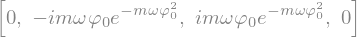

In [12]:
print(Q_hn)
Q_hs

### Harmonic Tunneling Operator

[0.0134048040282775 - 1.32348898008484e-23*I, 5.21250810921289e-5, 5.21250810921289e-5, 0.0134048040282775 - 1.32348898008484e-23*I]


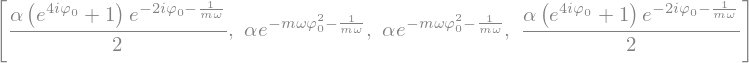

In [13]:
print(T_hn)
T_hs

### Harmonic Current Operator

[0.688806454653975, 0, 0, -0.688806454653975]


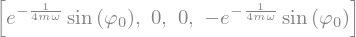

In [77]:
print(C_hn)
C_hs

----

## Operators acting on qubit states

In [78]:
# Qubit wave functions
g = L + R
e = L - R
indices = [[1,1,1,1], [1,-1,1,-1], [1,1,-1,-1], [1,-1,-1,1]]

In [79]:
# Qubit Operators
# Charge
Q_qn = []
Q_qs = []
for i in range(4):
    Q_qn.append( sum([0.5*a*b for a,b in zip(Q_hn,indices[i])]) )
    Q_qs.append( sum([0.5*a*b for a,b in zip(Q_hs,indices[i])]).simplify().nsimplify() )

In [80]:
# Tunneling
T_qn = []
T_qs = []
for i in range(4):
    T_qn.append( sum([0.5*a*b for a,b in zip(T_hn,indices[i])]) )
    T_qs.append( sum([0.5*a*b for a,b in zip(T_hs,indices[i])]).nsimplify() )

In [81]:
# Current
C_qn = []
C_qs = []
for i in range(4):
    C_qn.append( sum([0.5*a*b for a,b in zip(C_hn,indices[i])]) )
    C_qs.append( sum([0.5*a*b for a,b in zip(C_hs,indices[i])]).simplify().nsimplify() )

### Qubit Charge Operator

[0, 0.000966547262170031*I, -0.000966547262170031*I, 0]


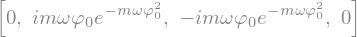

In [75]:
print(Q_qn)
Q_qs

### Qubit Tunneling Operator

[0.0134048040282775 - 1.32348898008484e-23*I, 5.21250810921289e-5, 5.21250810921289e-5, 0.0134048040282775 - 1.32348898008484e-23*I]


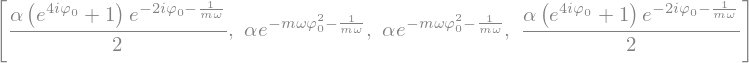

In [76]:
print(T_qn)
T_qs

### Qubit Current Operator

[0.688806454653975, 0, 0, -0.688806454653975]


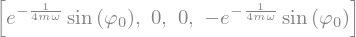

In [77]:
print(C_hn)
C_hs

Qubit charge operator 
 [0, -0.000966547262170033*I, 0.000966547262170033*I, 0]


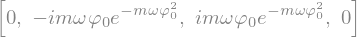

In [104]:
print('Qubit charge operator \n', Q_qn)
Q_qs

Qubit tunneling operator 
 [0.0134569291093696, 0, 0, 0.0133526789471854]


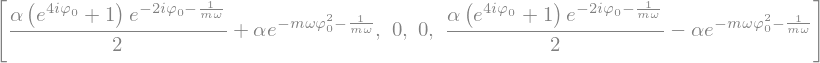

In [105]:
print('Qubit tunneling operator \n', T_qn)
T_qs

In [122]:
T_qs_I=[0,0,0,0]; T_qn_I=[0,0,0,0]; T_qs_Z=[0,0,0,0]; T_qn_Z=[0,0,0,0]

T_qs_I[0] = (T_qs[0]+T_qs[-1])/2; T_qs_I[-1] = (T_qs[0]+T_qs[-1])/2
T_qn_I[0] = (T_qn[0]+T_qn[-1])/2; T_qn_I[-1] = (T_qn[0]+T_qn[-1])/2
T_qs_Z[0] = (T_qs[0]-T_qs[-1])/2; T_qs_Z[-1] = (T_qs[0]-T_qs[-1])/2
T_qn_Z[0] = (T_qn[0]-T_qn[-1])/2; T_qn_Z[-1] = (T_qn[0]-T_qn[-1])/2

Qubit tunneling operator in I 
 [0.0134048040282775, 0, 0, 0.0134048040282775]


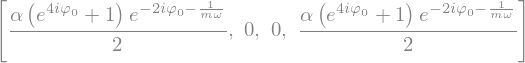

In [123]:
print('Qubit tunneling operator in I \n', T_qn_I)
T_qs_I

Qubit tunneling operator in I 
 [5.21250810921296e-5, 0, 0, 5.21250810921296e-5]


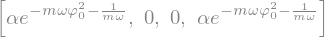

In [124]:
print('Qubit tunneling operator in I \n', T_qn_Z)
T_qs_Z

Qubit current operator 
 [0, 0.688806454653975, 0.688806454653975, 0]


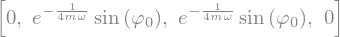

In [125]:
print('Qubit current operator \n', C_qn)
C_qs